# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups: Control (old page) & Treatment (new pae).

We will explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats #probability calcuations

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
enews = pd.read_csv('/content/drive/MyDrive/DSBA Certificate/abtest_Project2_data.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#read the first few rows of data set called enews
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#read last few rows of data set called ewnews
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#check shape of enews data (rows, columns)
print('There are', enews.shape[0], 'columns and', enews.shape[1],'rows in the data set.')

There are 100 columns and 6 rows in the data set.


In [ ]:
#identify types for the different categories of the enews data
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#apply .describe() to the numerical values of the dataset: user id & time spent
#we will not analyze user id statistics due to uniqueness
enews.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
#check for missing values
#unlikely due to information granted in enews.info() ; line 6
enews.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
print('There are no missing values in the data set. All 6 column categories have entires')

There are no missing values in the data set. All 6 column categories have entires


In [ ]:
#check for duplicates within enews data
#understand the categories within each column
print('There are', 100 - enews['user_id'].nunique(), 'duplicated entries for user id in the data set.')
print('There are', enews['group'].nunique(), 'categories of groups in the data set. These entries are listed as', enews['group'].unique())
print('There are', enews['landing_page'].nunique(), 'categories of landing page in the data set. These entries are listed as', enews['landing_page'].unique())
print('There are', enews['converted'].nunique(), 'categories of converted in the data set. These entries are listed as', enews['converted'].unique())
print('There are', enews['language_preferred'].nunique(), 'categories of preferred languages in the data set. These entries are listed as', enews['language_preferred'].unique())

There are 0 duplicated entries for user id in the data set.
There are 2 categories of groups in the data set. These entries are listed as ['control' 'treatment']
There are 2 categories of landing page in the data set. These entries are listed as ['old' 'new']
There are 2 categories of converted in the data set. These entries are listed as ['no' 'yes']
There are 3 categories of preferred languages in the data set. These entries are listed as ['Spanish' 'English' 'French']


### Univariate Analysis

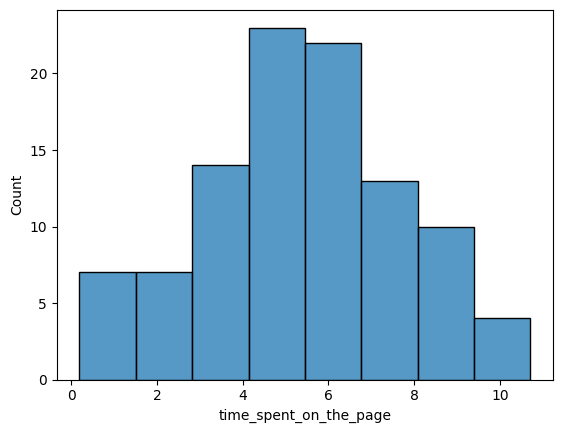

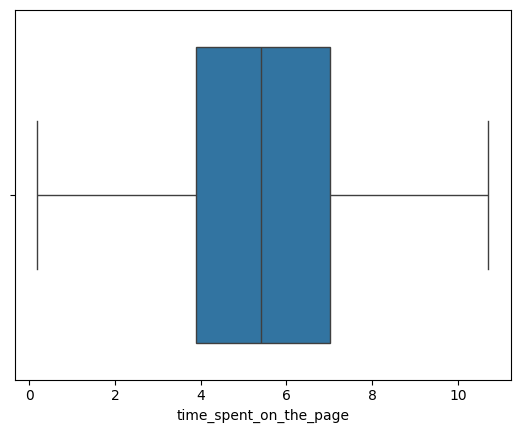

In [ ]:
#check shape of time spent
sns.histplot(enews,x='time_spent_on_the_page')
plt.show()
sns.boxplot(enews,x='time_spent_on_the_page')
plt.show()

Time spent has an average around 5.4 minutes. The medain of the data is close to the mean. This proximity reflects that there is no skew to the data; our analysis is supported by a lack of outliers displayed on the boxplot. Time spent seems to have a normal distribution (bell shaped histogram).
- We can further prove this using a Shapiro Test if needed.

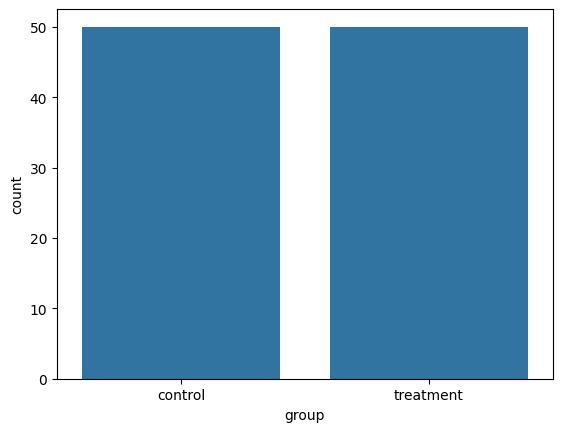

In [ ]:
#check counts for group type
sns.countplot(enews, x='group')
plt.show()

There are equal counts of users listed in the control and treatment groups.
Out of 100 data entries, 50% belong to each category.

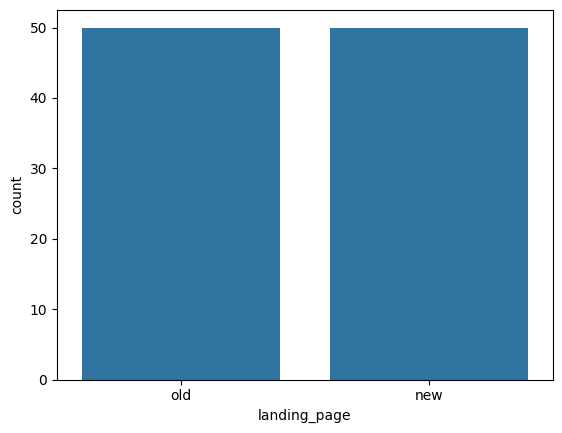

In [ ]:
#create countplot for langing page types
sns.countplot(data=enews, x='landing_page')
plt.show()

The countplots for 'Group' and 'Landing Page' are identitical. The data set is designed such that the Control Group received the Old landing Page (50 users) and the Treatment Group received the new Landing Page (50 users).

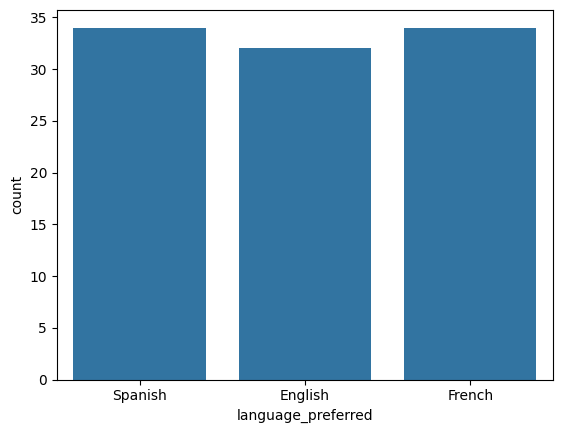

In [ ]:
#create countplot for preferred language
sns.countplot(data=enews, x='language_preferred')
plt.show()

Of the three language categories, Spanish and French had number of equal users, whereas English had the least.

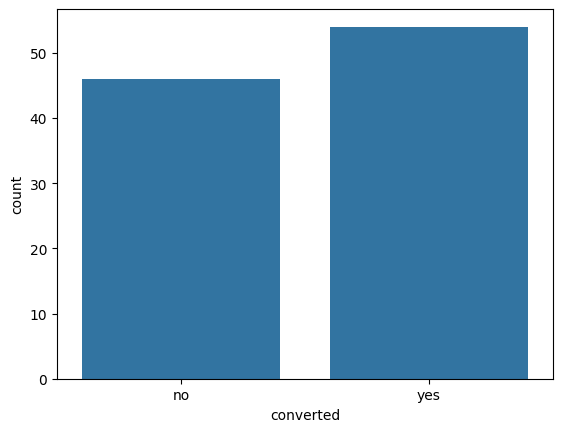

In [ ]:
#create countplot for converted
sns.countplot(data=enews, x='converted')
plt.show()

More than half of the total users converted. It will be worth investigating whichh landing page / treatment group the converted users stemmed from. The fact that >50% of the users converted is promising for the company.

### Bivariate Analysis

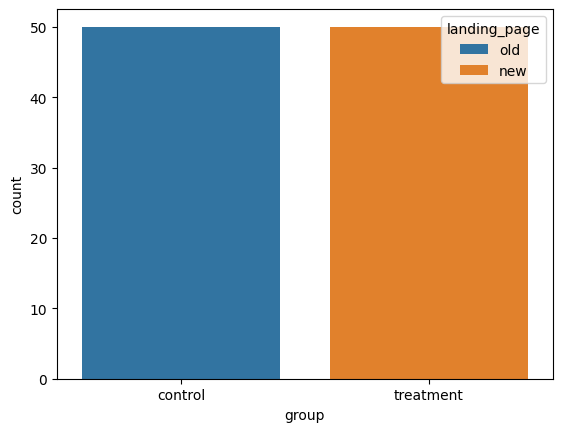

In [ ]:
#Ensure Group and Landing Page Relationship.
sns.countplot(data=enews, x='group', hue='landing_page')
plt.show()

Our assumptions were correct. The control group received the old landing page while the treatment group received the new landing page. These two columns in the data are not indepdent of each other. We can assume that the Control Group carries the same users as those that received the Old Landing Page; the Treatment group  carries the same users as those that received the New Landing Page.

<Axes: xlabel='time_spent_on_the_page', ylabel='landing_page'>

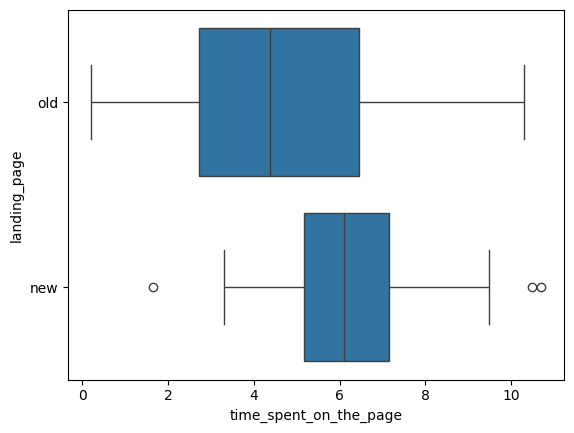

In [ ]:
#compare landing pages and time spent
sns.boxplot(data=enews, x='time_spent_on_the_page', y='landing_page')

Time spent on the old landing page has higher variability and lower median, whereas time spent on the new landing page has less variability and higher median. The new landing page has 3 outlier values; three users spent significantly less/more time on the landing page compared to the majority of the Treatment Group.
It is worth investigating if the visual displays statistically significant evidence of the relationship between Landing Page type and Time Spent.

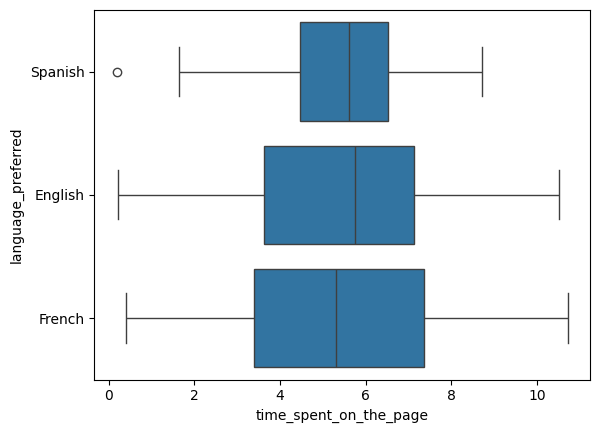

In [ ]:
#compare languages and time spent
sns.boxplot(data=enews, x='time_spent_on_the_page', y='language_preferred')
plt.show()

The measures of center are relatively close for all languages. We may need to investigate the means of these groups using an ANOVA test to better understand if the visual difference is significant to the groups or due to the differences in variability (spread) of each category.

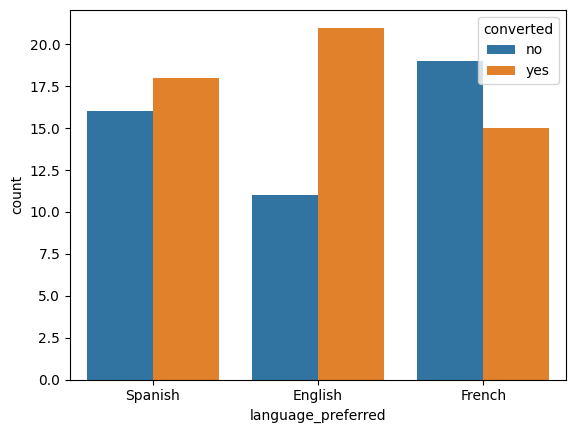

In [ ]:
#compare the converted counts to language
sns.countplot(data=enews, x='language_preferred', hue='converted')
plt.show()

The plot shows that English-speaking users have highest converted count, whereas French users have lowest converted count. It is recommended to investigate if converted users have any dependence on preferred language (Chi-Square Test).

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

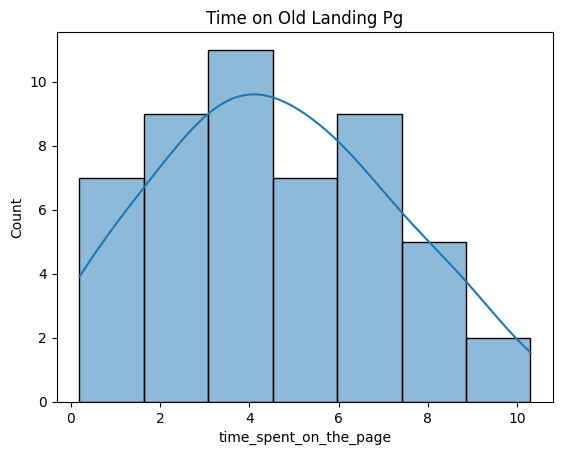

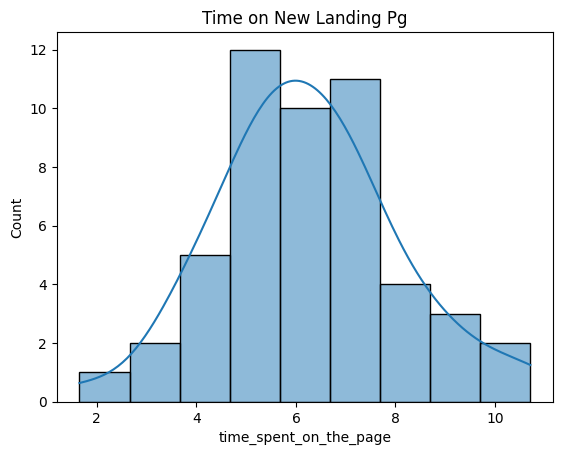

In [ ]:
#compare landing pages and time spent
sns.histplot(data=enews[enews['landing_page']=='old'], x='time_spent_on_the_page', kde=True).set(title='Time on Old Landing Pg')
plt.show()
sns.histplot(data=enews[enews['landing_page']=='new'], x='time_spent_on_the_page', kde=True).set(title='Time on New Landing Pg')
plt.show()

As seen in the bivariate analysis:
- The time spent on the Old Landing page is skewed right. the center of the data is around 4 minutes. This represents less time being spent on the old landing page.
- The time spent on the New Landing page is skewed left. The center of the data is around 6 minutes. This represents more time bieng spent on the New Landing page.

We will complete a statistical test to check if the company can trust this relationship as they makie further desicions while designing their platform.

### Step 1: Define the null and alternate hypotheses

## Null Hypothesis: the means of time spent on new landing page and old landing page are equivalent.
## Alternative Hypothesis: the mean time spent on the Old landing page is LESS than the mean time spent on the New landing page (one-sided).

### Step 2: Select Appropriate test

Because we will be comparing two sample means without knowing the population standard deviation, we will be using a 2 Sample Independent T-Test. It is important to note that we need to check the Standard Deviations of the two samples for equivalence to accurately complete the statistical test.

### Step 3: Decide the significance level

As usual, the significance level will be alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
#calculate the standard deviation of time spent on old and new page. Check if the standard deviations are equal or not.
old_times = enews[enews['landing_page']=='old']['time_spent_on_the_page']
new_times = enews[enews['landing_page']=='new']['time_spent_on_the_page']

old_std = round(old_times.std(), 3)
new_std = round(new_times.std(), 3)

#check if standard deviations are equal or not to make assumptions about population standard deviations and prepare for test
if old_std == new_std:
  print('We can assume the population standard deviations are equal. We will apply equal_var = True in our statistical test.')
else:
  print('We cannot assume the population standard deviations are equal. We will apply equal_var = False in our statistical test.')

We cannot assume the population standard deviations are equal. We will apply equal_var = False in our statistical test.


### Step 5: Calculate the p-value

In [ ]:
#apply ttest_ind to calculate the p value and draw conclusions
from scipy.stats import ttest_ind


test_stat, p_value = ttest_ind(old_times, new_times, equal_var = False, alternative = 'less')
print('The p value is: ', p_value)

The p value is:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#use boolean to declare hypothesis statement
if p_value < 0.05:
  print('We reject the Null Hypothesis. There is significant evidence that users spend Less time on the Old Landing Page and the New Landing Page.')
else:
  print('We fail to reject the Null Hypothesis. There is NOT significant evidence that users spend Less time on the Old Landing Page than the New Landing Page.')

We reject the Null Hypothesis. There is significant evidence that users spend Less time on the Old Landing Page and the New Landing Page.


### Step 7:  Draw inference

With a P-Value of (~0.00013) the data shows that, on average, Less time is spent on the Old Landing Page compared to the New Landing Page. The ENews website's new design encourages users to explore more of their website; it is recommended that ENews continues using the New display of the Landing Page.
It is best practice to move forward with the platform that encourages longer engagement from users.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<Axes: xlabel='landing_page'>

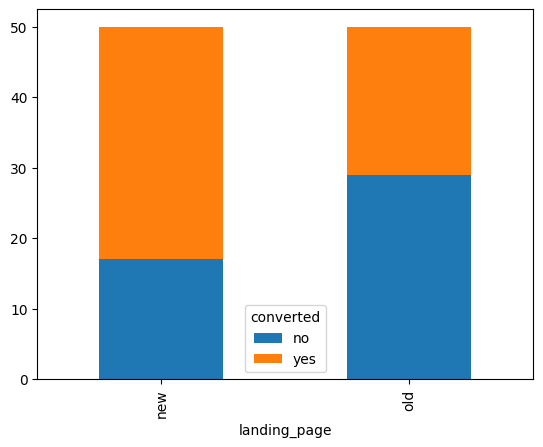

In [ ]:
#create a visual display
pd.crosstab(enews.landing_page, enews.converted, normalize=False).plot(kind='bar', stacked=True)

- The bar plot shows a higher proportion of converted users when engaging with the New Landing page. We must check if this relationship is statistically significant using a 2 Sample Proportion Z Test.

It is worth mentioning that the proportions meet the assumptions of the Z-Test such that, for each landing page proportion, np & n(1-p) > 10.

Example of assumptions being met:
New Landing Page Converted Users np Check: 50(33/50) = 33 > 10

New Landing Page Converted Users n(1-p) Check: 50(17/50) = 17 > 10

In [ ]:
print('Null Hypothesis: the proportion of users who got converted from the Old landing page is the same as the new landing page.', '\n',
      'Alternative Hypothesis: the proportion of converted users from the Old landing page is Less than those converted with the New landing page')

#import required statistical test
from statsmodels.stats.proportion import proportions_ztest

# set the converted counts for each group // numerators of each proportion
old_converts = enews[enews['landing_page']=='old']['converted'].value_counts()['yes']
new_converts = enews[enews['landing_page']=='new']['converted'].value_counts()['yes']

#create array to input in statistical test
converted_users = np.array([old_converts, new_converts])

# set the totals from each group // denominators of each proportion
old_user_total = enews['landing_page'].value_counts()['old']
new_user_total = enews['landing_page'].value_counts()['new']

#create array to input in statistical test
totals = np.array([old_user_total, new_user_total])

#calculate p value
test_stat, p_value = proportions_ztest(converted_users, totals, alternative = 'smaller')

# display results
print('The p value = ', p_value)

if p_value < 0.05:
  print('We reject the Null Hypothesis. The data shows evidence that the proportion of converted users from the Old landing page is Less than those converted with the New landing page')
else:
  print('We fail to reject the null hypothesis. There is not significant data to support that the proportion of converted users from the Old landing page is less than those converted with the New landing page.')

Null Hypothesis: the proportion of users who got converted from the Old landing page is the same as the new landing page. 
 Alternative Hypothesis: the proportion of converted users from the Old landing page is Less than those converted with the New landing page
The p value =  0.008026308204056278
We reject the Null Hypothesis. The data shows evidence that the proportion of converted users from the Old landing page is Less than those converted with the New landing page


Inference:
The Treatment group, also known as the users who received the New Landing Page, showed to be more likely to subscribe to the ENews platform than those in the Control Group receiving the Old Landing Page.
The New Landing page is an effective feature that ENews should continue to implement in order to gain more subscribers. The Old Landing page does not serve the goals of the company as well as their new product.

## 3. Is the conversion and preferred language are independent or related?

In [ ]:
#save a copy of enews to be safe
chi_enews = enews.copy()

In [ ]:
#use the copy to create a contingency table to tabulate the frequencies of the two categorical variables
cont_table = pd.crosstab(chi_enews.language_preferred, chi_enews.converted, margins = False, normalize = False)
cont_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18



Analysis of Categorical Variables:
- There are a total of 100 people in the data
- 32% of users prefer English, 34% prefer French, 34% prefer Spanish
- About 66% of English users converted
- About 44% of French users converted
- About 53% of spanish sers converted



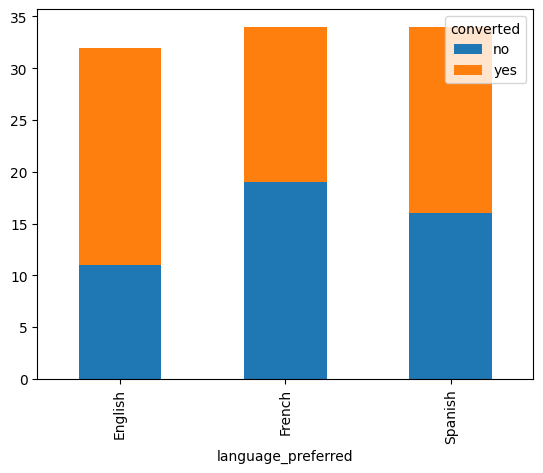

In [ ]:
#visualize the above statements regarding the insights of the contingency table using a bar plot
cont_table.plot(kind='bar', stacked= True)
plt.show()

Based on the sample data, we can see that English users have highest proportion of converting. We will check if the differences amongst the Languages is significant.
We will apply a Chi-Square Test of Independence.

In [ ]:
#Set the null and alternate hypothesis of the Chi Square statistical test.
print('The Null Hypothesis is that the converted users are independent of preferred language.', '\n',
      'The alternative hypothesis is that the converted users depend on preferred language.', '\n', 'The test will be completed with a significance level of alpha = 0.05')


The Null Hypothesis is that the converted users are independent of preferred language. 
 The alternative hypothesis is that the converted users depend on preferred language. 
 The test will be completed with a significance level of alpha = 0.05


In [ ]:
#import required test
from scipy.stats import chi2_contingency
#calculate the test results using our contingency table
chi, p_value, dof, expected = chi2_contingency(cont_table)

#view results
print('Test Statistic = ', chi)
print('print value = ', p_value)
print('Degrees of Freedon = ', dof)
print('Expected Frequencies: \n', expected)

#compare p value to alpha
if p_value < 0.05:
  print('We reject the null hypothesis. We have significant evidence that converted users are depdendent on preferred language.')
else:
  print('We fail to reject the null hypothesis. There is not significant evidence to state that converted users have a relationship to preferred language.')

Test Statistic =  3.0930306905370832
print value =  0.2129888748754345
Degrees of Freedon =  2
Expected Frequencies: 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]
We fail to reject the null hypothesis. There is not significant evidence to state that converted users have a relationship to preferred language.


Inference:
Since the p value is NOT less than a 5% signifcance level, we must work under the assumption that converted users and their preferred lagnuages are independent of of each other.
ENews does not have a stronger or weaker market for gaining subscribers of one language category compared to others.

## 4. Is the time spent on the new page same for the different language users?

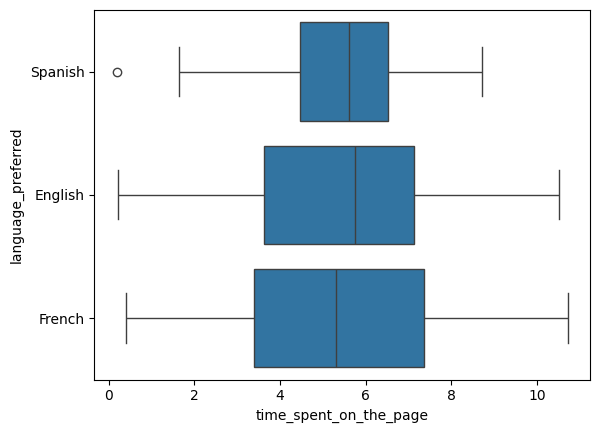

In [ ]:
#recall bivariate analysis of time spent and preferred language
sns.boxplot(data=enews, x='time_spent_on_the_page', y='language_preferred')
plt.show()

Insights:
- The distributions of time spent seems to differ among the three language categories.
- The median time spent is very close for French and Spanish, but the variation is higher for French users compared to Spanish.
We will apply an ANOVA test to check if the observed disparities amongst the three languages is significant and better understand the users within these categories.

In [ ]:
#check the assumption of Normality required to complete a One-Way ANOVA Test
print('Null Hypothesis: the time spent for the language categories follow a normal distribution.', '\n', 'Alternative Hypothesis: the time spent for the language categories do not follow a normal distribtuion')

#import required test to check normality
from scipy.stats import shapiro

#calculate p value
test_stat, p_value = shapiro(enews['time_spent_on_the_page'])

#display result
print('The p value = ', p_value)
if p_value < 0.05:
  print('We reject the Null Hypothesis. The time spent does not follow a normal distribution and we cannot complete a One-Way ANOVA test.')
else:
  print('We fail to reject the Null Hypothesis. We can assume the time spent follows a normal distirbtuion and can continue with our statistical test.')

Null Hypothesis: the time spent for the language categories follow a normal distribution. 
 Alternative Hypothesis: the time spent for the language categories do not follow a normal distribtuion
The p value =  0.5643193125724792
We fail to reject the Null Hypothesis. We can assume the time spent follows a normal distirbtuion and can continue with our statistical test.


In [ ]:
#check the assumption of Homogenity of Variance required to continue a One-Way ANOVA Test
print('Null Hypothesis: all population variances are equal.', '\n', 'Alternate Hypothesis: At least one variance is different from the rest.')

#import required test to check equivalence of population variances
from scipy.stats import levene

#calculate p value
test_stat, p_value = levene(enews[enews['language_preferred']=='French']['time_spent_on_the_page'],
enews[enews['language_preferred']=='English']['time_spent_on_the_page'], enews[enews['language_preferred']=='Spanish']['time_spent_on_the_page'])

#display result
print('the p value = ', p_value)
if p_value < 0.05:
  print('We reject the null hypothesis. The population variances cannot be assumed equivalent; we cannot complete a One-Way ANOVA test.')
else:
  print('We fail to reject the null hypothesis. The population variances can be assumed equivalent; we can continue with our statistical test.')

Null Hypothesis: all population variances are equal. 
 Alternate Hypothesis: At least one variance is different from the rest.
the p value =  0.06515086840327314
We fail to reject the null hypothesis. The population variances can be assumed equivalent; we can continue with our statistical test.


In [ ]:
#create variables to store time data with respect to language
french_time = enews[enews['language_preferred']=='French']['time_spent_on_the_page']
english_time = enews[enews['language_preferred']=='English']['time_spent_on_the_page']
spanish_time = enews[enews['language_preferred']=='Spanish']['time_spent_on_the_page']

#Define null and alternative hypothesis
print('Null Hypothesis: the mean time spent on page is equal for all three language categories.', '\n', 'Alternative Hypothesis: at least one of the mean times spent in the three language categories is different.',
      '\n', 'We will complete the test at a 5% level of significance.')

#import required test
from scipy.stats import f_oneway

#calculate p value
test_stat, p_value = f_oneway(french_time, english_time, spanish_time)

#display result
print('The p value = ', p_value)
if p_value < 0.05:
  print('We reject the null hypothesis. There is significant evidence that at least one of the three languages has a different average of time spent on the page.')
else:
  print('We fail to reject the null hypothesis. There is not enough statistical evidence to declare the mean times different for any of the three languages.')

Null Hypothesis: the mean time spent on page is equal for all three language categories. 
 Alternative Hypothesis: at least one of the mean times spent in the three language categories is different. 
 We will complete the test at a 5% level of significance.
The p value =  0.8665610536012648
We fail to reject the null hypothesis. There is not enough statistical evidence to declare the mean times different for any of the three languages.


Inference:
With a p-value greater than our level of significance (alpha = 0.05), we see that the relationships between time and language preference do not differ significantly. This means that English, French, and Spanish-speaking users of ENews have very similar time-based habits on the platform. The company does not need to investigate further into the relationship between time spent on the page for each preferred language.

## Conclusion and Business Recommendations

- The A/B test conducted for ENews displayed promising results for the New Landing Page in respect to time of engagement as well as promoting subscriptions:
  - Data showed that the design of the New Landing Page was effectively researched and implemented. Users that interacted with the New page spent more time looking over what it had to offer.
  - Data showed that the New Landing page promoted more users to subscribe to ENews than their previous platform. ENews was correct in their concerns in over their old platform.

- ENews offers the same design to users regardless of language preference (English, Spanish, French). There is not disparity in the subscriber ('converted') or time spent characteristics based on language.
  - The data did NOT show statistical evidence of one language having different expected subscribing rates compared others. The two categories are independent. It is not recommended for ENews to dedicate themselves to further investigations of the relationship between subscriber rates and language.
  - The data did NOT show that the average time spent on the platform significantly varied with respect to preferred language. Users of all languages are engaging with the landing page(s) at similar rates.
    - If ENews changes more elements of their platform based on the users' preferred language, these tests should be repeated for further analysis.

Overall Recommendations:
- ENews must broadcast the New Landing Page to all users as soon as possible, as it is the most effective tool to reach their goals of gaining subscribers.
- ENews should reflect on where their platform is most commonly used (e.g., Central America, North America, Europe). This may allow ENews to initiate a new experiment to collect further language information and revisit the studies where we Failed to Reject the Null Hypothesis.
- Alternatively, ENews could provide our Data Science team with a larger sample size (e.g., 1,000 users) to better investigate the relationships and differences with users' languages and engagement with their platform.

Happy Learning!

___